## Урок 2. 

# Анализ данных и проверка статистических гипотез. <a class='anchor' id='stat'>

**План занятия**

* [**Анализ данных и проверка статистических гипотез**](#stat)
    * [Теоретическая часть](#theory)
        * [Теория вероятностей и математическая статистика](#prob_theory_and_math_stat)
        * [Что такое статистическая гипотеза?](#stat_hypothesis)
        * [Проверка статистических гипотез](#stat_hypothesis_test)
        * [Критерий Шапиро-Уилка](#shapiro_criterion)
        * [Критерий Стьюдента (t-test), двухвыборочный](#student_criterion)
        * [Критерий хи-квадрат (критерий согласия Пирсона)](#pirson_criterion)
        * [Доверительные интервалы](#conf_interval)
    * [Практическая часть](#practice)
        * [Загрузка данных](#load_data)
        * [Анализ целевой переменной](#target_analysis)
        * [Анализ признакового пространства](#features_analysis)
    * [Что можно сделать с курсовой](#course_work)
* [**Модели машинного обучения**](#models)
    * [Linear Regression](#linear)
    * [Decision tree](#tree)
    * [Random Forest](#rf)
    * [Gradient Boosting decision trees](#boost)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

### Теория вероятностей и математическая статистика<a class="anchor" id="prob_theory_and_math_stat">

**Теория вероятностей** изучает модели случайных величин и свойства этих моделей.

**Математическая статистика и анализ данных** пытаются по свойствам конечных выборок определить свойства случайной величины, чтобы понять, как она будет вести себя в будущем.

### Что такое статистическая гипотеза?<a class="anchor" id="stat_hypothesis"></a>

**Статистическая гипотеза** - предположение о виде распределения и свойствах случайной величины, которое можно подтвердить или опровергнуть применением статистических методов к данным выборки.

**Нулевая гипотеза** - некоторое, принимаемое по-умолчанию предположение, о том, что не существует связи между двумя наблюдаемыми событиями, отклонения показателей и других неожиданных результатов, словом нет никакого эффекта.

**Альтернативная гипотеза** - в качестве альтернативы, как правило, выступает проверяемое предположение, но также бывает, что альтернатива не задана явно, в этом случаем рассматривают отрицание утверждение, заданного в нулевой гипотезе.

**Проверка статистической гипотезы** - это процесс принятия решения о том, противоречит ли рассматриваемая статистическая гипотеза наблюдаемой выборке данных.

**Статистический тест или статистический критерий** - строгое математическое правило, по которому принимается или отвергается статистическая гипотеза.

**Пример формализованного описания гипотезы**

$\large x^n = (x_1, .. , x_n), \: x^n \in X, \: X \sim P$<br>
$\large H_0: \: P \in \omega$<br>
$\large H_1: \: P \notin \omega$<br>
$\large T(x^n), \: T(x^n) \sim F_0(t) \: | \: H_0, \: T(x^n) \nsim F_0(t) \: | \: H_1$<br>

$\normalsize H_0$ - нулевая гипотеза<br>
$\normalsize H_1$ - альтернативная гипотеза<br>
$\normalsize X$ - случайная величина<br>
$\normalsize x^n$ - выборка размера $n$ из случайной величины $X$<br>
$\normalsize P$ - некоторое распределение случайной величины $X$<br>
$\normalsize \omega$ - некоторое семейство распределений<br>
$\normalsize T(x^n)$ - статистика от выборки $x^n$<br>
$\normalsize F_0(t)$ - нулевое распределение статистики<br>

В данном примере проверяется гипотеза $\normalsize H_0$ о том, что распределение $\normalsize P$ случайной величины $\normalsize X$, принадлежит некоторому семейству распределений, которое определёно нами заранее, допустим это семейство нормальных распределений. В качестве альтернативы выступает гипотеза $\normalsize H_1$, утверждающая, что распределение $\normalsize P$ принадлежит какому то иному семейству распределений.

Статистика $\normalsize T(x^n)$ и её нулевое распределение $\normalsize F_0(t)$ образуют *статистический критерий*.

### Проверка статистических гипотез<a class="anchor" id="stat_hypothesis_test"></a>

**Методика проверки статистических гипотез**

1. Cформулировать гипотезы $\normalsize H_0$ и $\normalsize H_1$
2. Выбрать подходящий статистический критерий, исходя из сформулированных гипотез, размера выборки(ок) и т.д.
3. Зафиксировать уровень значимости $\normalsize \alpha$
4. Рассчитать значение статистики $\normalsize T$ и достигаемые уровень значимости $\normalsize p-value^* = P(T \ge t \: | \: H_0)$
5. Если $\normalsize p-value < \alpha$, $\normalsize H_0$ отвергается в пользу $\normalsize H_1$, т.к вероятность получить такие данные (выборку), при верности $\normalsize H_0$, крайне мала.

*достигаемый уровень значимости, p-value* - это вероятность, при справедливости нулевой гипотезы, получить такое же распределение статистики, как в эксперименте, или ещё более экстремальное.


[Видео](https://youtu.be/9jW9G8MO4PQ) с объяснениями p value на собаке.
<img src='images_21-02/p_value.png'>

**Ошибки первого и второго рода**

Ошибка первого рода — когда нулевая гипотеза отвергается, хотя на самом деле она верна.<br>
Ошибка второго рода — когда нулевая гипотеза принимается, хотя на самом деле она не верна.<br>

|$H_0$             |**верная**                                    |**ложная**                                 |
|:----------------:|:--------------------------------------------:|:-----------------------------------------:|
|**принимается**   |$H_0$ верно принята                           |$H_0$ неверно принята (ошибка второго рода)|
|**отклоняется**   |$H_0$ неверно отвергнута (ошибка первого рода)|$H_0$ верно отвергнута                     |

В механизме проверки гипотез ошибки первого и второго рода неравнозначны, ошибка первого рода критичнее, любой корректный статистический критерий должен обеспечивать вероятность ошибки первого рода не больше, чем $\normalsize \alpha$,<br>
$\normalsize P(H_0 \: отвергнута \: | \: H_0) = P (p \le \alpha \: | \: H_0) \le \alpha$

Ошибка второго рода связана с понятием мощности статистического критерия,<br>
$\normalsize pow = P(H_0 \: отвергнута \: | \: H_1) = 1 - P(H_0 \: принята \: | \: H_1)$ - вероятность отклонить нулевую гипотезу, при верности альтернативы.

### Критерий Шапиро-Уилка<a class="anchor" id="shapiro_criterion"></a>

Данный критерий проверяет гипотезу о том, что некоторая случайная величина имеет нормальное распределение (распределение Гаусса). Необходимость проверять случайную величину на "нормальность", обусловлена тем, что многие статистические критерии и  аналитические методы из мат. статистики ориентированы на выборки из нормально распределённых случайных величин и перед их использование необходимо убедиться в том, что закон распределения приближен к нормальному.

Помимо этого нормально распределённые случайные величины обладают некоторыми свойствами, которые могут быть полезны в процессе работы с ними.

In [1]:
import numpy as np
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [2]:
np.sqrt(np.mean((a - np.mean(a)) ** 2))

1.4142135623730951

In [3]:
np.std(a)

1.4142135623730951

**Нормальное распределение**
1. Унимодально
2. Симметрично
3. Подчиняется вероятностному распределению
    
    - $\text{ от }-\sigma \text{ до } \sigma $ ~ 68%
    - $\text{ от }-2\sigma \text{ до } 2\sigma $ ~ 95%
    - $\text{ от }-3\sigma \text{ до } 3\sigma $ ~ 99%

<img src="images_21-02/normal_distr.png">

**Формализованное описание**

$\large x^n = (x_1, .. , x_n), \: x^n \in X$<br>

$\large H_0: \: X \sim N(\mu, \sigma^2)$<br>
$\large H_1: \: H_0 \: неверна$<br>

$\large W(x^n) = \frac{(\sum_{i=1}^n a_i x_i)^2}{\sum_{i=1}^n (x_i - \bar{x})^2} $<br>

Нулевое распределение статистики - табличное.

### Критерий Стьюдента (t-test), двухвыборочный<a class="anchor" id="student_criterion"></a>

Критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента.<br> Наиболее часто данные критерии применяются для проверки равенства средних значений (мат. ожиданий) в двух выборках.

**Формализованное описание**

$\large x_1^{n_1} = (x_{11}, .. , x_{1{n_1}}), \: x_1^{n_1} \in X_1, \: X_1 \sim N(\mu_1, \sigma_1^2)$<br>
$\large x_2^{n_2} = (x_{21}, .. , x_{2{n_1}}), \: x_2^{n_2} \in X_2, \: X_2 \sim N(\mu_2, \sigma_2^2)$<br>

$\large H_0: \: \mu_1 = \mu_2$<br>
$\large H_1: \: \mu_1 \ne \mu_2$<br>

$\large T(x_1^{n_1}, x_2^{n_2}) = \frac{\bar{x_1} \: - \: \bar{x_2}}{\sqrt{\frac{S_1^2}{n_1} - \frac{S_2^2}{n_2}}}$<br>
$\large T(x_1^{n_1}, x_2^{n_2}) \sim St$

**Условия применения**

* нормальное распределение, отсутствие выбросов
* размер выборки не меньше 30 наблюдений

Если данные не отвечают этим критериям, то применяется *U критерий Манна-Уитни* - это непараметрический тест, в котором для расчета используются не исходные данные, а их ранговые позиции. 

<img src='images_21-02/t-stud.png'>

### Критерий хи-квадрат (критерий согласия Пирсона)<a class="anchor" id="pirson_criterion"></a>

Критерий хи-квадрат позволяет оценить значимость различий между фактическим (выявленным в результате исследования) количеством исходов и теоретическим количеством, которое можно ожидать в изучаемых группах при справедливости нулевой гипотезы. Выражаясь проще, метод позволяет оценить статистическую значимость различий двух или нескольких относительных показателей (частот, долей).

**Формализованное описание**

$\large x^n = (x_1, .. , x_n), \: x^n \in X$<br>

$\large H_0: \: Эмпирические \: (наблюдаемые) \: и \: теоретические \: (ожидаемые) \: частоты \: согласованы$ <br>
$\large H_1: \: H_0 \: неверна$<br>

$\large \chi^2(x^n) = \sum_{i=1}^K \frac{(O_i - E_i)^2}{E_i}$<br>
$O$ (Observed) - наблюдаемые частоты<br> 
$E$ (Expected) - ожидаемые частоты<br>
$K$ - количество оцениваемых частот

$\large \chi^2(x^n) \sim \chi^2$

**Условия применения**

Сопоставляемые группы должны быть независимыми, то есть критерий хи-квадрат не должен применяться при сравнении наблюдений "до-после" или связанных пар. Аналог для зависимых выборок - *тест Мак-Немара* или *Q-критерий Кохрена* для сравнения трех и более групп.

Если в ячейке меньше 10 наблюдений, применяется *поправка Йетса*. 

Если меньше 5, то вместо хи-квадрат используется *точный тест Фишера*.

<img src='images_21-02/chi2.png'>

### Доверительные интервалы<a class="anchor" id="conf_interval"></a>

Вид интервальной оценки, которая задаёт числовые границы, в которых, с определённой вероятностью, находится истинное значение оцениваемого параметра.

**Порядок расчета доверительного интервала (для мат. ожидания)**

1. Задать уровень достоверности (confidence level), $\normalsize \alpha = 95\% = 0.95$
2. Найдите по таблице Z-оценок или рассчитать коэффициент достоверности (confidence coefficient) - $\normalsize Z_{\alpha/2}$, для $\normalsize \alpha = 0.95, Z_{\alpha/2} = 1.96$
3. Рассчитать доверительный интервал (confidence interval), $\normalsize CI = \bar{x} \pm Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$,<br>
где $\normalsize \bar{x}$ - выборочное среднее, $\normalsize \sigma$ - стандартное отклонение, $\normalsize n$ - размер выборки

<img src='images_21-02/interval.png'>

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

**Подключение библиотек и скриптов**

In [4]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
import warnings
warnings.simplefilter('ignore')

**Пути к директориям и файлам**

In [6]:
DATASET_PATH = './data/training_project/training_project_data.csv'
PREP_DATASET_PATH = './data/training_project/training_project_data_prep.csv'

### Загрузка данных<a class="anchor" id="load_data"></a>

**Описание базового датасета**

* **LIMIT_BAL** - Сумма предоставленного кредита
* **SEX** - Пол (1=мужчина, 2=женщина)
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение (1=женат/замужен, 2=не женат/не замуженм, 3=прочее)
* **AGE** - Возраст (в годах)
* **PAY_1** - Статус погашения в Сентябре (-1=погашен полностью, 0=погашен частично, 1=отсрочка платежа на один месяц, .., 3=отсрочка платежа на три месяца и более)
* **PAY_2** - Статус погашения в Августе
* **PAY_3** - Статус погашения в Июле
* **PAY_4** - Статус погашения в Июне
* **PAY_5** - Статус погашения в Мае
* **PAY_6** - Статус погашения в Апреле
* **BILL_AMT1** - Сумма выписки по счету в Сентябре
* **BILL_AMT2** - Сумма выписки по счету в Августе
* **BILL_AMT3** - Сумма выписки по счету в Июле
* **BILL_AMT4** - Сумма выписки по счету в Июне
* **BILL_AMT5** - Сумма выписки по счету в Мае
* **BILL_AMT6** - Сумма выписки по счету в Апреле
* **PAY_AMT1** - Сумма предыдущего платежа в Сентябре
* **PAY_AMT2** - Сумма предыдущего платежа в Августе
* **PAY_AMT3** - Сумма предыдущего платежа в Июле
* **PAY_AMT4** - Сумма предыдущего платежа в Июне
* **PAY_AMT5** - Сумма предыдущего платежа в Мае
* **PAY_AMT6** - Сумма предыдущего платежа в Апреле
* **NEXT_MONTH_DEFAULT** - Просрочка платежа в следующем месяце (1=да, 0=нет)

In [7]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           10000 non-null  float64
 1   SEX                 10000 non-null  int64  
 2   EDUCATION           10000 non-null  int64  
 3   MARRIAGE            10000 non-null  int64  
 4   AGE                 10000 non-null  int64  
 5   PAY_1               10000 non-null  int64  
 6   PAY_2               10000 non-null  int64  
 7   PAY_3               10000 non-null  int64  
 8   PAY_4               10000 non-null  int64  
 9   PAY_5               10000 non-null  int64  
 10  PAY_6               10000 non-null  int64  
 11  BILL_AMT1           10000 non-null  float64
 12  BILL_AMT2           10000 non-null  float64
 13  BILL_AMT3           10000 non-null  float64
 14  BILL_AMT4           10000 non-null  float64
 15  BILL_AMT5           10000 non-null  float64
 16  BILL_

**Выделение целевой переменной и групп признаков**

In [9]:
TARGET_NAME = 'NEXT_MONTH_DEFAULT'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

NUM_FEATURE_NAMES = ['LIMIT_BAL', 'AGE',
                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

CAT_FEATURE_NAMES = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [10]:
NEW_FEATURE_NAMES

Index(['IS_MALE', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4',
       'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_3_-1', 'PAY_3_0',
       'PAY_3_1', 'PAY_3_2', 'PAY_3_3', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2',
       'PAY_4_3', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_6_-1',
       'PAY_6_0', 'PAY_6_2', 'PAY_6_3'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           10000 non-null  float64
 1   SEX                 10000 non-null  int64  
 2   EDUCATION           10000 non-null  int64  
 3   MARRIAGE            10000 non-null  int64  
 4   AGE                 10000 non-null  int64  
 5   PAY_1               10000 non-null  int64  
 6   PAY_2               10000 non-null  int64  
 7   PAY_3               10000 non-null  int64  
 8   PAY_4               10000 non-null  int64  
 9   PAY_5               10000 non-null  int64  
 10  PAY_6               10000 non-null  int64  
 11  BILL_AMT1           10000 non-null  float64
 12  BILL_AMT2           10000 non-null  float64
 13  BILL_AMT3           10000 non-null  float64
 14  BILL_AMT4           10000 non-null  float64
 15  BILL_AMT5           10000 non-null  float64
 16  BILL_

**Корреляция с базовыми признаками**

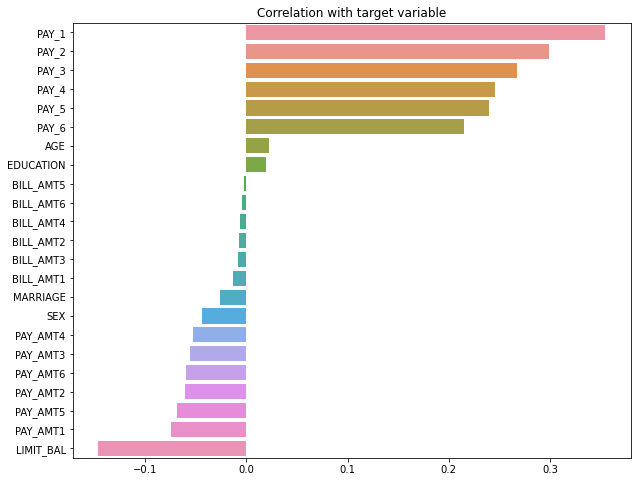

In [12]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Оценка признака "PAY_1" в разрезе целевой переменной**

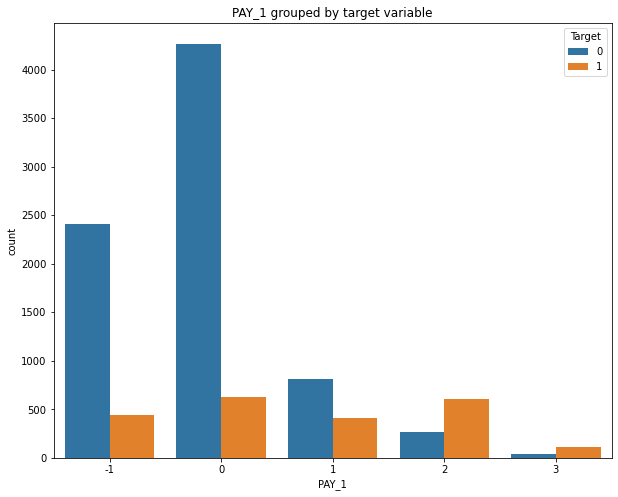

In [13]:
plt.figure(figsize=(10, 8))

sns.countplot(x="PAY_1", hue=TARGET_NAME, data=df)
plt.title('PAY_1 grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

**Наблюдение**

Изучив получившийся график, видно, что значения -1 (погашен полностью) и 0 (погашен частично) признака PAY_1 имеют схожие доли в разрезе целевой переменной. Если это действительно так, то можно будет, например, объединить их в одну категорию.

**Гипотеза** 

* Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы
* Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
* Критерий: Хи-квадрат Пирсона
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо подать наблюдаемые частоты категорий -1 и 0 признака PAY_1 в выбранный критерий, после чего оценить значение достигаемого уровня значимости p-value и сравнить с его с выбранным порогом альфа, если p-value получится больше выбранного порога, то гипотезу о согласованности частот можно не отбрасывать.

*Рассчитаем наблюдаемые частоты*

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LIMIT_BAL           10000 non-null  float64
 1   SEX                 10000 non-null  int64  
 2   EDUCATION           10000 non-null  int64  
 3   MARRIAGE            10000 non-null  int64  
 4   AGE                 10000 non-null  int64  
 5   PAY_1               10000 non-null  int64  
 6   PAY_2               10000 non-null  int64  
 7   PAY_3               10000 non-null  int64  
 8   PAY_4               10000 non-null  int64  
 9   PAY_5               10000 non-null  int64  
 10  PAY_6               10000 non-null  int64  
 11  BILL_AMT1           10000 non-null  float64
 12  BILL_AMT2           10000 non-null  float64
 13  BILL_AMT3           10000 non-null  float64
 14  BILL_AMT4           10000 non-null  float64
 15  BILL_AMT5           10000 non-null  float64
 16  BILL_

In [15]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


In [16]:
df['Id'] = df.index
pay1_and_target_s = df.loc[df['PAY_1'].isin([0, -1]), ['Id', 'PAY_1', 'NEXT_MONTH_DEFAULT']]

In [17]:
table = pay1_and_target_s.pivot_table(values='Id', index='PAY_1', columns='NEXT_MONTH_DEFAULT', aggfunc='count')
table

NEXT_MONTH_DEFAULT,0,1
PAY_1,,
-1,2413,439
0,4266,629


*Проверим нашу гипотезу, используя критерий Хи-квадрат Пирсона*

In [18]:
chi2, p, _, _ = chi2_contingency(table)
p

0.001955227349870234

In [19]:
pay1_and_target = df.loc[df['PAY_1'].isin([2, 3]), ['Id', 'PAY_1', 'NEXT_MONTH_DEFAULT']]
table = pay1_and_target.pivot_table(values='Id', index='PAY_1', columns='NEXT_MONTH_DEFAULT', aggfunc='count')

chi2, p, _, _ = chi2_contingency(table)
p

0.7365984943034862

P-value получилось больше выбранного уровня значимости, соответственно у нас нет оснований для отвержения нулевой гипотезы и можно допустить, что категории 2 и 3 одинаково влияют на целевую переменную и их можно объединить в одну категорию. 

\*Для других признаков PAY_2, PAY_3, и т.д. следует провести аналогичный анализ и после этого решать о целесообразности изменения категорий или построения новых признаков.

**Оценка признака "LIMIT_BAL" в разрезе целевой переменной**

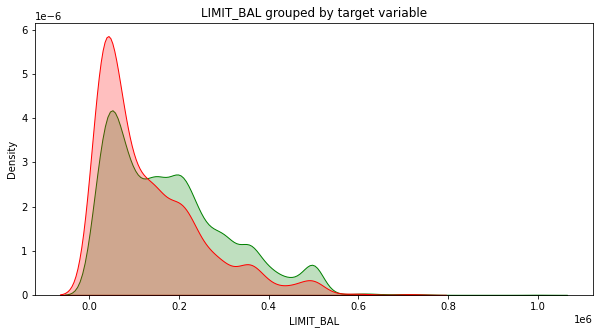

In [20]:
limit_bal_with_target = df[['LIMIT_BAL', TARGET_NAME]]
limit_bal = limit_bal_with_target['LIMIT_BAL']
limit_bal_target_0 = limit_bal[limit_bal_with_target[TARGET_NAME] == 0]
limit_bal_target_1 = limit_bal[limit_bal_with_target[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(limit_bal_target_0, shade=True, label='Нет просрочки', color='g')
sns.kdeplot(limit_bal_target_1, shade=True, label='Просрочка', color='r')

plt.xlabel('LIMIT_BAL')
plt.title('LIMIT_BAL grouped by target variable')
plt.show()

**Наблюдение**

Похоже что две группы, полученные в результате разбиения признака "LIMIT_BAL" по целевой переменной, имеют различные распределения, что может помочь при построение модели, т.к. это будет означать, что между признаком "LIMIT_BAL" и целевой переменной, возможно, существует некоторая функциональная зависимость.

**Гипотеза** 
* Нулевая гипотеза: средние значения в двух независимых выборках равны
* Альтернативная гипотеза: средние значения в двух независимых выборках различаются
* Критерий: критерий Стьюдента (t-тест) и его аналоги
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Что бы проверить данную гипотезу сравним две выборки из рассматриваемых групп на предмет равенства средних значений.
Если вероятность того, что мат. ожидания в исходных группах равны, при данных выборках, будет менее 5%, то можно будет говорить о том, что скорее всего выборки имеют различные распределения.

*Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка*

In [21]:
shapiro(limit_bal)

ShapiroResult(statistic=0.907916247844696, pvalue=0.0)

По полученному значению p-value, которое сильно меньше 0.05, можем заключить, что гипотеза о "нормальности" отвергается.

*Для достоверности произведём визуальную оценку распределения признака, а так же построим QQ-график*

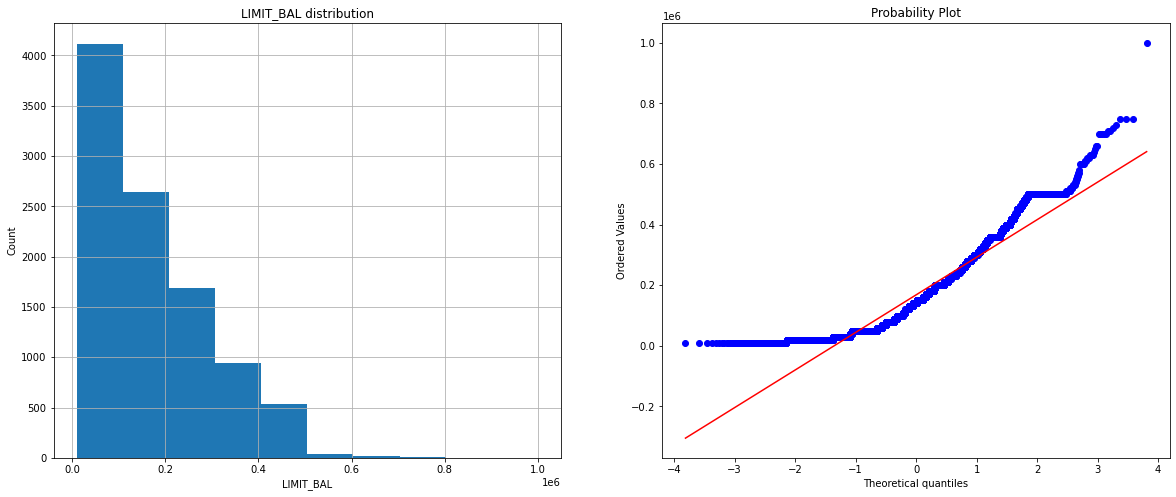

In [22]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('LIMIT_BAL')
ax1.set_ylabel('Count')
ax1.set_title('LIMIT_BAL distribution')
limit_bal.hist()

plt.subplot(122)
probplot(limit_bal, dist='norm', plot=plt)

plt.show()

<img src='images_21-02/distr.png' width=400px>

Визуальная оценка подтверждает показания критерия Шапиро-Уилка по поводу того, что закон распределения отличный от "нормального", в связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака LIMIT_BAL в группах с просроченным и непросроченным платежом в следующем месяце, но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

*Оценим эквивалентность мат. ожадиний, в исследуемых группах, с помощью критерия Манна-Уитни*

In [23]:
mannwhitneyu(limit_bal_target_0, limit_bal_target_1)

MannwhitneyuResult(statistic=6614519.0, pvalue=2.0756208080867333e-60)

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается, но стоит ради дополнительной проверки обратиться к доверительным интервалам.

*Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их*

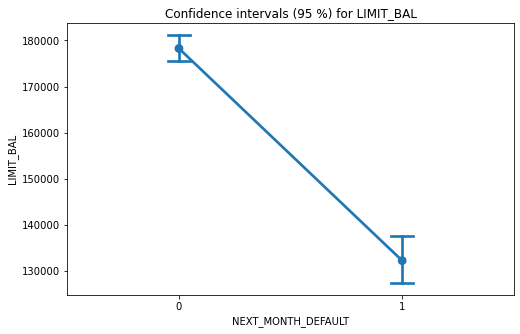

In [24]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='LIMIT_BAL', data=limit_bal_with_target, capsize=.1)

plt.title('Confidence intervals (95 %) for LIMIT_BAL')
plt.show()

По данному графику так же видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.

Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.

**Оценка признака "PAY_AMT" в разрезе целевой переменной**

In [25]:
PAY_AMT = 'PAY_AMT6'

pay_amt_with_target = df[[PAY_AMT, TARGET_NAME]]
pay_amt = pay_amt_with_target[PAY_AMT]
pay_amt_target_0 = pay_amt[pay_amt_with_target[TARGET_NAME] == 0]
pay_amt_target_1 = pay_amt[pay_amt_with_target[TARGET_NAME] == 1]

In [26]:
mannwhitneyu(pay_amt_target_0, pay_amt_target_1)

MannwhitneyuResult(statistic=7032012.0, pvalue=1.6475387076155157e-38)

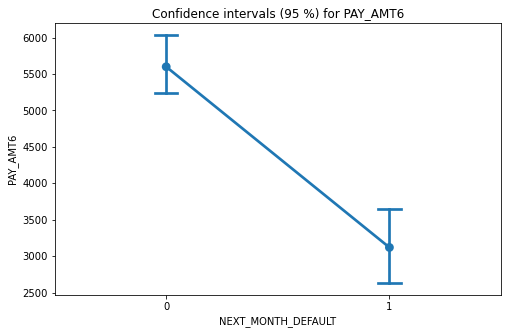

In [27]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y=PAY_AMT, data=pay_amt_with_target, capsize=.1)

plt.title(f'Confidence intervals (95 %) for {PAY_AMT}')
plt.show()

### Анализ признакового пространства<a class="anchor" id="features_analysis"></a>

**Матрица корреляций**

- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Корреляция - мера только __линейной__ связи

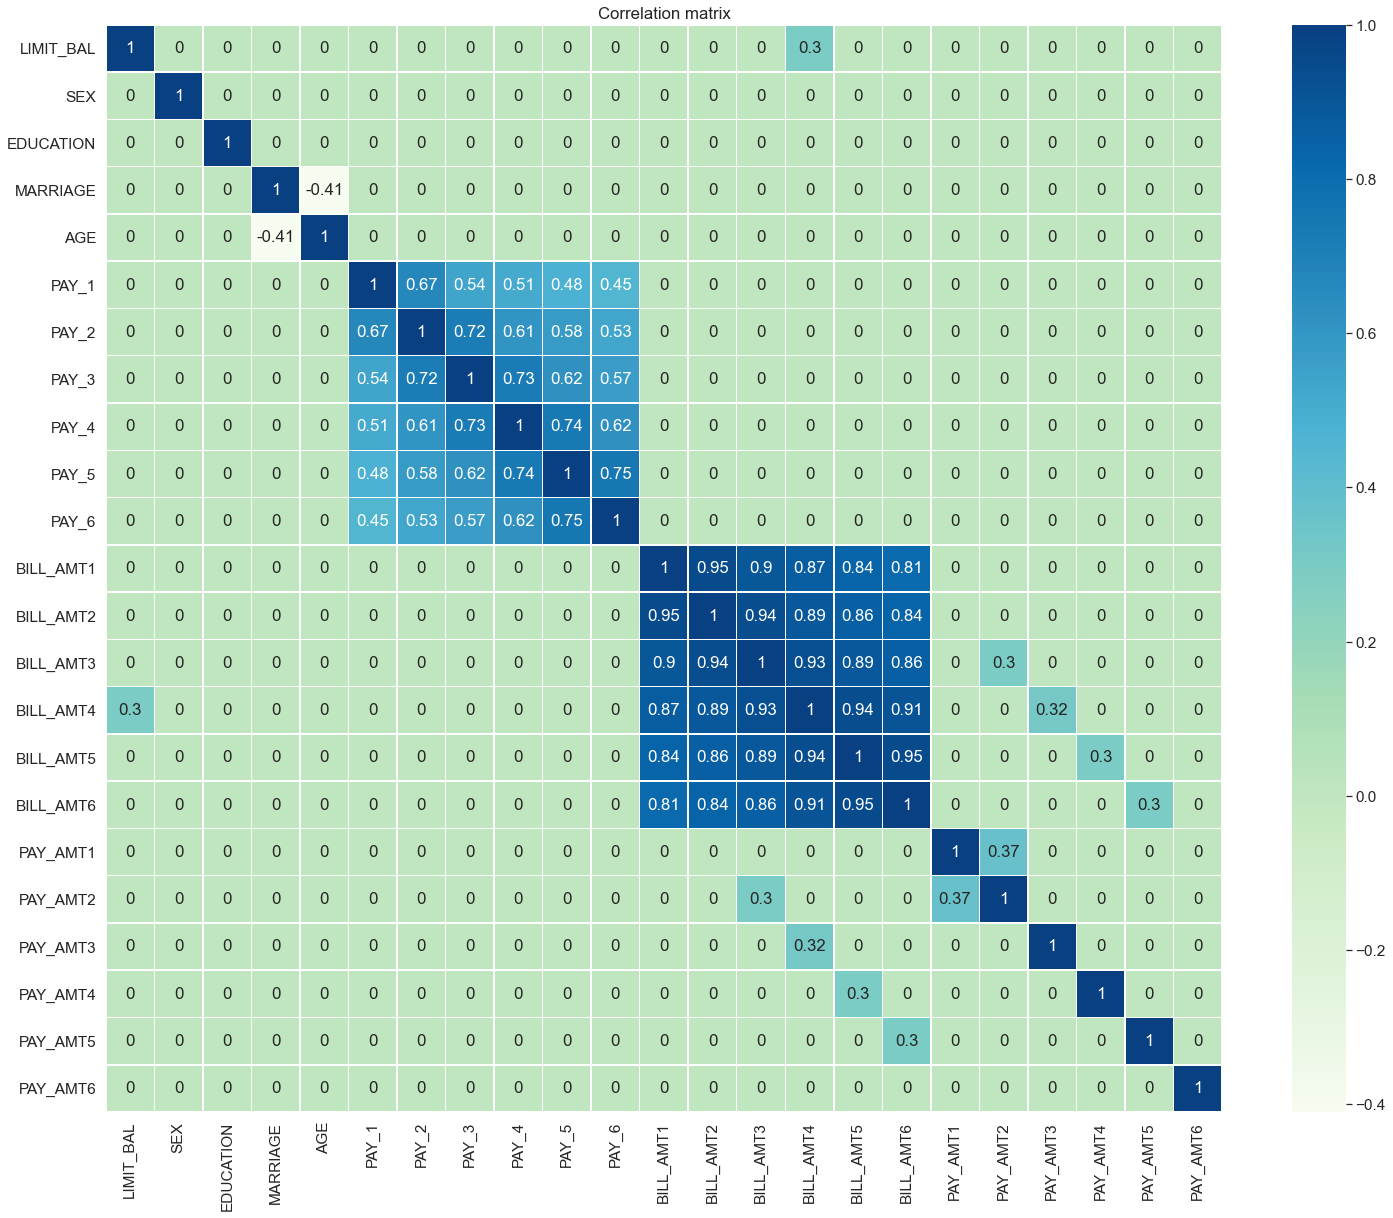

In [28]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)

corr_matrix = df[BASE_FEATURE_NAMES].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [29]:
from sklearn.metrics import mutual_info_score

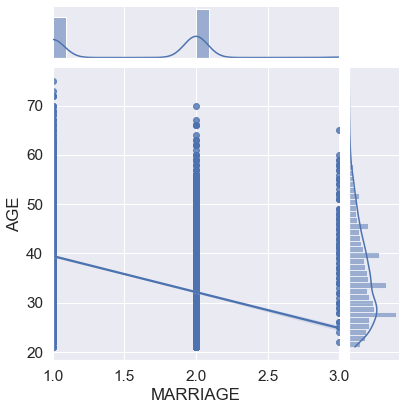

In [30]:
sns.jointplot(df['MARRIAGE'], df['AGE'], kind='reg');

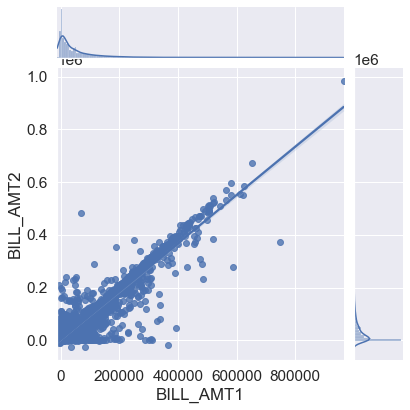

In [31]:
sns.jointplot(df['BILL_AMT1'], df['BILL_AMT2'], kind='reg');

### **Что можно сделать с курсовой:** <a class='anchor' id='course_work'>

1. Понять, похож ли тест на трейн
2. Построить корреляции с таргетом
3. Изучить признаки с высокой корреляцией
4. Посмотреть на категориальные признаки и посокращать кол-во значений
5. Матрица корреляции

In [32]:
df['NEXT_MONTH_DEFAULT'].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,
                               test_size=0.2,
                               shuffle=True,
                               stratify=df['NEXT_MONTH_DEFAULT'],
                               random_state=12)

In [34]:
train['NEXT_MONTH_DEFAULT'].value_counts(normalize=True)

0    0.7805
1    0.2195
Name: NEXT_MONTH_DEFAULT, dtype: float64

In [35]:
test['NEXT_MONTH_DEFAULT'].value_counts(normalize=True)

0    0.7805
1    0.2195
Name: NEXT_MONTH_DEFAULT, dtype: float64

**Проверим распределения вещественных признаков на трейне и тесте**

LIMIT_BAL
MannwhitneyuResult(statistic=7997465.0, pvalue=0.4912331603752067)


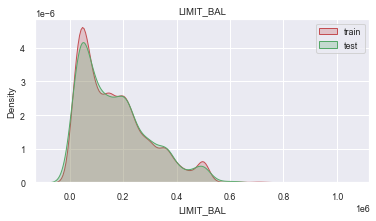

AGE
MannwhitneyuResult(statistic=7945900.0, pvalue=0.31960880983690154)


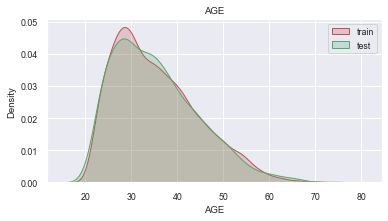

BILL_AMT1
MannwhitneyuResult(statistic=7938842.0, pvalue=0.29816404004003655)


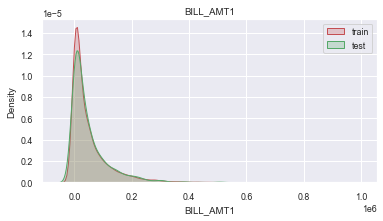

BILL_AMT2
MannwhitneyuResult(statistic=7944374.0, pvalue=0.31495704370568545)


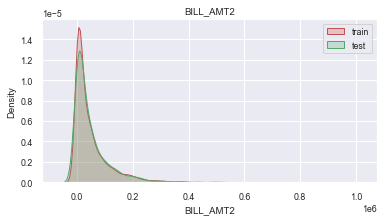

BILL_AMT3
MannwhitneyuResult(statistic=7958039.5, pvalue=0.3581038982050207)


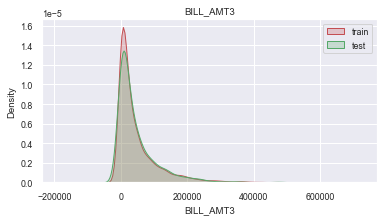

BILL_AMT4
MannwhitneyuResult(statistic=7929510.0, pvalue=0.27066075902865216)


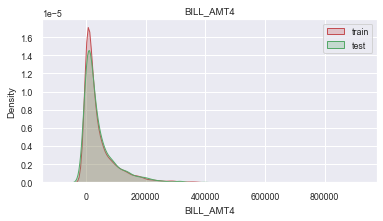

BILL_AMT5
MannwhitneyuResult(statistic=7948716.0, pvalue=0.3283571979678732)


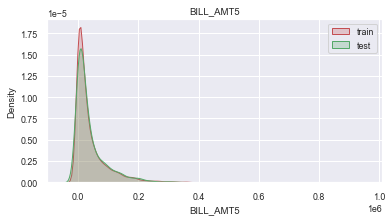

BILL_AMT6
MannwhitneyuResult(statistic=7962342.0, pvalue=0.3720323863941127)


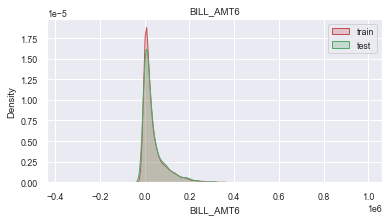

PAY_AMT1
MannwhitneyuResult(statistic=7995252.5, pvalue=0.48355898315003726)


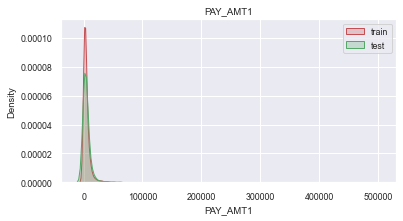

PAY_AMT2
MannwhitneyuResult(statistic=7947562.5, pvalue=0.32434612651668016)


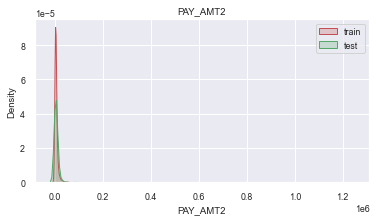

PAY_AMT3
MannwhitneyuResult(statistic=7957601.0, pvalue=0.3561659296728524)


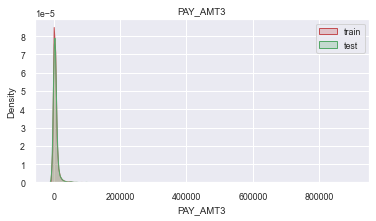

PAY_AMT4
MannwhitneyuResult(statistic=7944099.5, pvalue=0.3132553741018117)


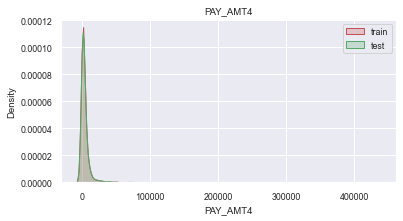

PAY_AMT5
MannwhitneyuResult(statistic=7875318.5, pvalue=0.13884687001547424)


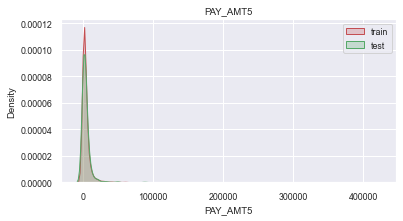

PAY_AMT6
MannwhitneyuResult(statistic=7930194.5, pvalue=0.2714053314964858)


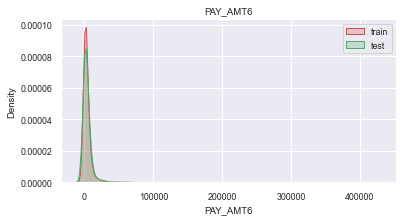

In [36]:
figsize = (6, 3)
for col in NUM_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.set(font_scale=0.8)
    sns.kdeplot(train[col], shade=True, label='train', color='r')
    sns.kdeplot(test[col], shade=True, label='test', color='g')
    print(col)
    print(mannwhitneyu(train[col], test[col]))
    plt.legend()
    plt.title(col)
    plt.show()

**Проверим распределения категориальных признаков на трейне и тесте**

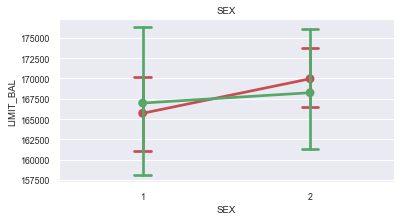

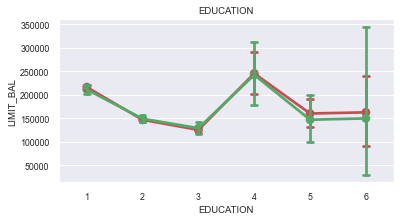

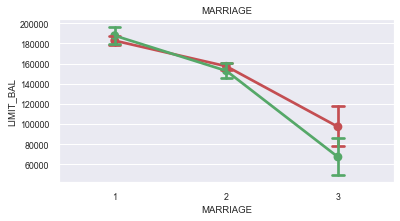

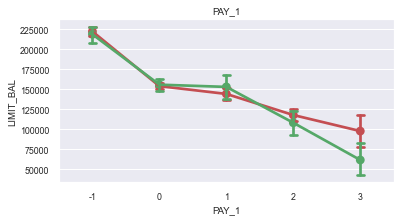

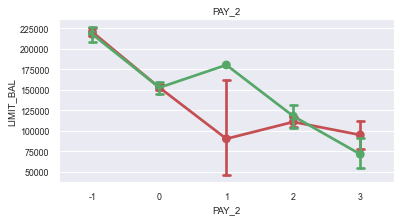

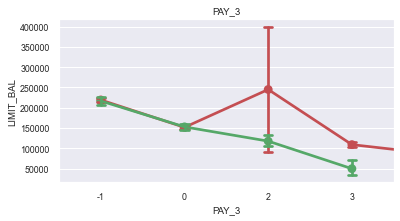

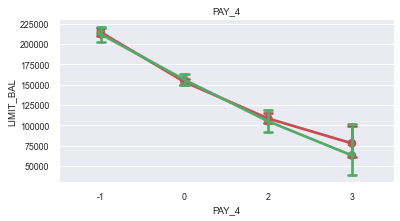

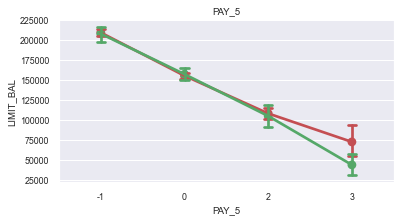

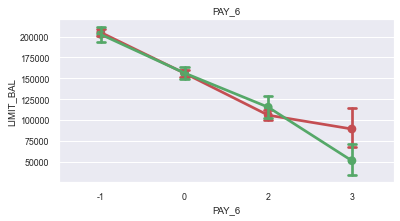

In [37]:
num_feature = 'LIMIT_BAL'
for col in CAT_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.pointplot(x=col, y=num_feature, data=train, capsize=.1, label='train', color='r')
    sns.pointplot(x=col, y=num_feature, data=test, capsize=.1, label='test', color='g')
    plt.title(col) 
    plt.show()

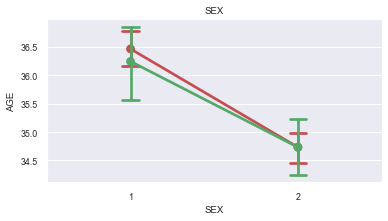

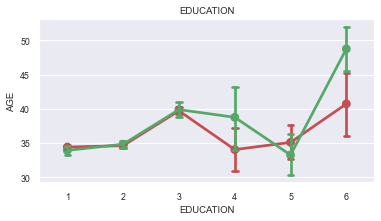

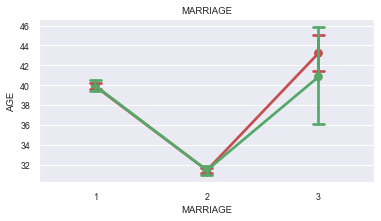

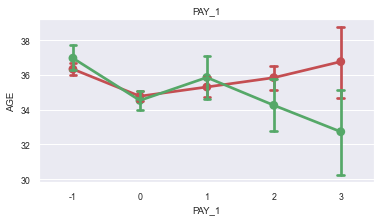

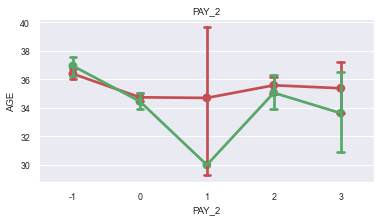

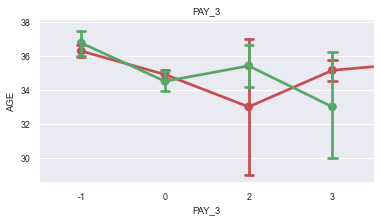

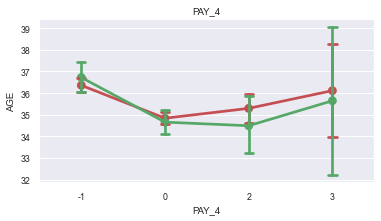

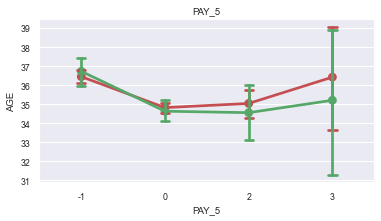

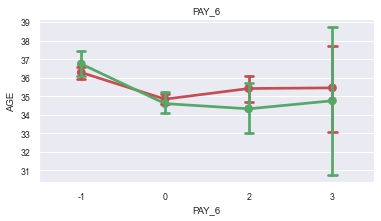

In [38]:
num_feature = 'AGE'
for col in CAT_FEATURE_NAMES:
    plt.figure(figsize=figsize)
    sns.pointplot(x=col, y=num_feature, data=train, capsize=.1, label='train', color='r')
    sns.pointplot(x=col, y=num_feature, data=test, capsize=.1, label='test', color='g')
    plt.title(col)
    plt.show()

**Сократим количество значений в признаке**

In [39]:
train['PAY_1'].unique()

array([ 0,  1, -1,  2,  3], dtype=int64)

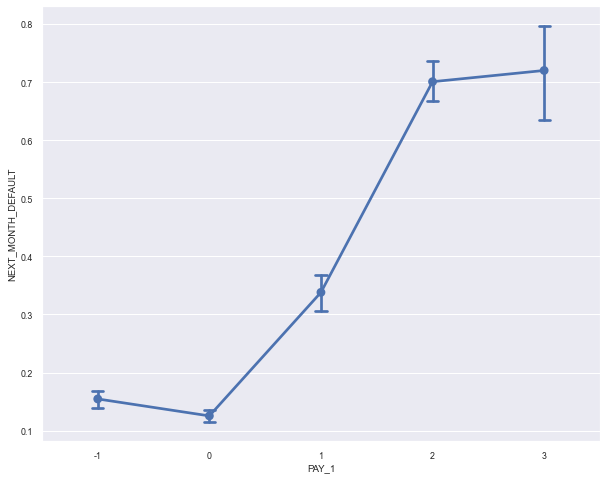

In [40]:
plt.figure(figsize=(10, 8))

sns.pointplot(x='PAY_1', y='NEXT_MONTH_DEFAULT', data=train, capsize=.1,);

In [41]:
def change_pay_1(df):
    df.loc[df['PAY_1'].isin([-1, 0]),'PAY_1'] = 0
    df.loc[df['PAY_1'].isin([2, 3]), 'PAY_1'] = 2
    return df


test = change_pay_1(test)
train = change_pay_1(train)

In [42]:
train['PAY_1'].value_counts()

0    6191
1     982
2     827
Name: PAY_1, dtype: int64

In [43]:
test['PAY_1'].value_counts()

0    1556
1     235
2     209
Name: PAY_1, dtype: int64

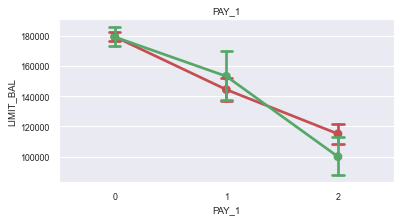

In [44]:
num_feature = 'LIMIT_BAL'
col = 'PAY_1'
plt.figure(figsize=figsize)
sns.pointplot(x=col, y=num_feature, data=train, capsize=.1, label='train', color='r')
sns.pointplot(x=col, y=num_feature, data=test, capsize=.1, label='test', color='g')
plt.title(col)
plt.show()

In [45]:
del_cols = ['PAY_2', 'PAY_3']

train.drop(columns=del_cols, inplace=True)
test.drop(columns=del_cols, inplace=True)

# Модели машинного обучения<a class='anchor' id='models'>

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [47]:
DATASET_PATH = './housing.csv'

df = pd.read_csv(DATASET_PATH, sep=';')

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 
            'households', 'median_income', '<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN']
target = 'median_house_value'
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,0,0,0,1,0,2083.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,0,0,0,1,0,2083.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,0,0,0,1,0,2083.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.445840,0.437991,0,0,0,1,0,2083.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,17.209588,0.347265,0,0,0,1,0,2083.0


**Стандартизация признаков** 

In [48]:
feature_names_for_stand = df[features].select_dtypes(include=['float64', 'float32', 'float16']).columns.tolist()
feature_names_for_stand

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

**Нормализация** - MinMaxScaler() Для каждой фичи x делает:
$$\frac{x_i - min}{max - min}$$
После нормализации признак будет изменяться в диапазоне [0, 1].<br>
Лучше зарекомендовала себя в моделях, которые работают с расстояниями (KNN).

<br>

**Стандартизация** - StandardScaler(). Для каждой фичи х делает:
$$\frac{x - mean}{std}$$
После стандартизации у признака будут mean = 0, std = 1.<br>
Лучше зарекомендовала себя в линейных моделях.

In [49]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [50]:
stand_features

array([[-1.32808414,  1.0526849 ,  0.99834348, ..., -0.97895544,
        -0.97703285,  2.34476576],
       [-1.32309264,  1.04332074, -0.62047107, ...,  0.87825927,
         1.66996103,  2.33223796],
       [-1.33307563,  1.03863866,  1.88869149, ..., -0.82351755,
        -0.84363692,  1.7826994 ],
       ...,
       [ 0.62359171, -1.0776619 ,  1.88869149, ..., -0.61180044,
        -0.55330458, -0.25269878],
       [ 0.62359171, -1.07297982,  1.88869149, ..., -0.96198234,
        -0.88810223, -0.59721314],
       [ 0.54372773, -1.03084109,  0.02705475, ..., -0.88962332,
        -0.85409934, -0.66664239]])

In [51]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [52]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-1.328084,1.052685,0.998343,-0.804819,-0.972476,-0.978955,-0.977033,2.344766,452600.0,NEAR BAY,14.659091,0.365909,0,0,0,1,0,2083.0
1,-1.323093,1.043321,-0.620471,2.045890,1.357143,0.878259,1.669961,2.332238,358500.0,NEAR BAY,15.579659,0.338217,0,0,0,1,0,2083.0
2,-1.333076,1.038639,1.888691,-0.535746,-0.827024,-0.823518,-0.843637,1.782699,352100.0,NEAR BAY,12.951602,0.338105,0,0,0,1,0,2083.0
3,-1.338067,1.038639,1.888691,-0.624215,-0.719723,-0.768132,-0.733781,0.932968,341300.0,NEAR BAY,18.445840,0.437991,0,0,0,1,0,2083.0
4,-1.338067,1.038639,1.888691,-0.462404,-0.612423,-0.761878,-0.629157,-0.012881,342200.0,NEAR BAY,17.209588,0.347265,0,0,0,1,0,2083.0


In [53]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=100)

In [54]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(6, 6))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

    
ML метрика - Mean Squared Error (**MSE**) 
    - MSE прямопропорциональна RMSE и R^2
    - MSE  удобно оптимизировать (брать производные)
    - MSE используется "под капотом" наших ML моделей



Бизнес метрика - **R^2**, Root Mean Squared Error (**RMSE**)
    - Бизнес метрика интерпретируема
    - Понятна бизнесу
    - Ее мы показываем бизнесу
    - RMSE - насколько, в среднем, $ мы ошибаемся при предсказании цен 
    - R^2 принимает значения от 0 до 1, если 1 - все предсказания идеальны. Можно сказать, что это "точность" модели

Лучшая модель - модель с наименьшей MSE на test 

 $$MSE = \frac{1}{n}  \sum{(y - y_{pred})^2}$$

$$RMSE = \sqrt{\frac{1}{n}  \sum{(y - y_{pred})^2}}$$

$$R^2 = 1 - \frac{\frac{1}{n}\sum{(y - y_{pred})^2}}{\frac{1}{n}\sum{(y - y_{mean})^2}}$$

### Linear Regression  <a class='anchor' id='linear'>

<img src='images_21-02/linear_reg.png' width=500px>

In [55]:
y = ax + b

NameError: name 'ax' is not defined

$$price_{pred} = a_0 + a_1 * households + a_2 * rooms$$

Подробное объяснение [здесь](https://codecamp.ru/blog/introduction-to-linear-regression-python/)

$$Loss = MSE = \frac{1}{n}\sum{(price - price_{pred})^2}$$

$$Loss = MSE = \frac{1}{n}\sum{(price - (a_0 + a_1 * households + a_2 * rooms))^2}$$

$dx^2 = 2x$

$d4x = 4$

Находим производные по параметрам и решим систему из 3 уравнений с 3 неизвестными:

$$\frac{dLoss}{da_0} = \frac{1}{n}\sum{2*(price-(a_0 + a_1 *households + a_2*rooms)) * 1} = 0 $$  
$$\frac{dLoss}{da_1} = \frac{1}{n}\sum{2*(price-(a_0 + a_1 *households + a_2*rooms)) * households} = 0 $$  
$$\frac{dLoss}{da_2} = \frac{1}{n}\sum{2*(price-(a_0 + a_1 *households + a_2*rooms)) * rooms} = 0 $$  

In [ ]:
np.clip([-10, 1, 100000, 1000000], a_min=10000, a_max=500000)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
# Постпроцессинг
y_train_preds = np.clip(y_train_preds, a_min=10000, a_max=500000)

evaluate_preds(y_train, y_train_preds)

In [ ]:
y_test_preds = lr_model.predict(X_test)

# Постпроцессинг
y_test_preds = np.clip(y_test_preds, a_min=10000, a_max=500000)

evaluate_preds(y_test, y_test_preds)

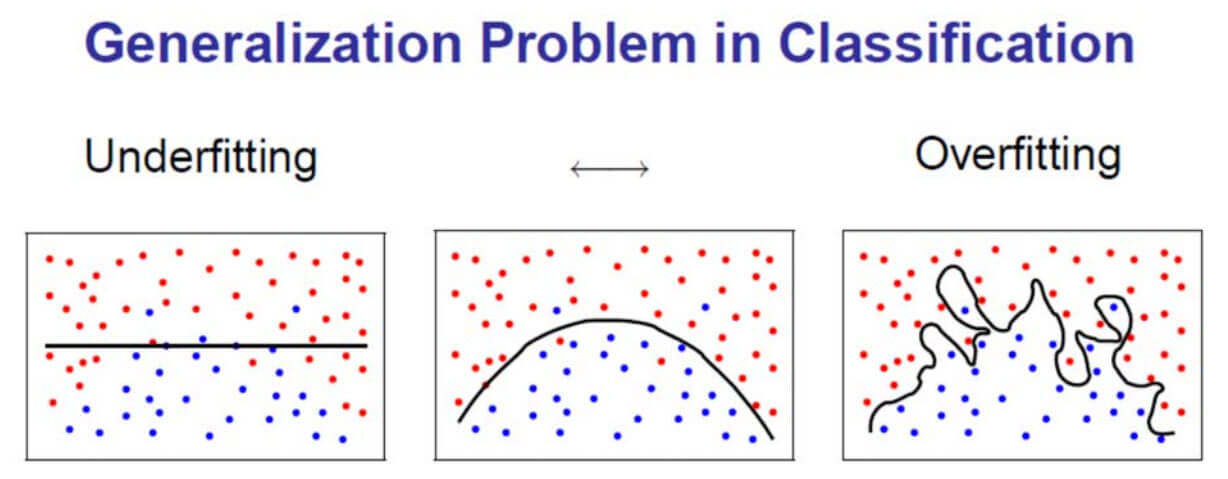

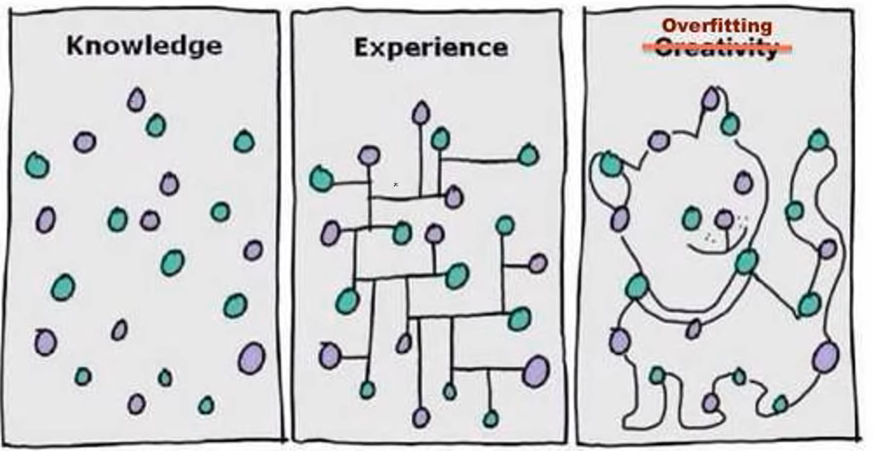

### Decision tree  <a class='anchor' id='tree'>

Подробнее можно почитать [здесь](https://habr.com/ru/company/ods/blog/322534/)

На примере задачи: _Сколько времени человек потратит на онлайн игры?_  (0 - 24 часа/день)

<img src='images_21-02/dt_explained.png'>

- age < 15 and is_male > 0.5 ---> 5
- age < 15 and is_male <= 0.5 ---> 0
- age >= 15 ---> 1

Decision tree может моделировать зависимости такого вида:

<img src='images_21-02/dt_example.png'>

In [ ]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=7, # глубина дерева  
                                 min_samples_leaf=3, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(X_train, y_train)

y_train_preds = dt_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

In [ ]:
y_test_preds = dt_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [ ]:
plt.style.use('default')

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, filled = True);

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, filled = True, max_depth=2);

In [ ]:
AutoML
H2O

### Random Forest  <a class='anchor' id='rf'>

Про лес подробнее можно почитать [здесь](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

**Независимо** строятся N деревьев. Их **предсказания усредняются**

Чтобы деревья получались разными добавляют элемент случайности:
- каждое дерево строят на подвыборке данных (случайно сэмплируют 70% данных)
- каждое дерево строят на подвыборке фич (случайно сэмплируют 70% фич)
- ...

<img src='images_21-02/rf_explained.png'>

Бутстрэп - выбираем из обучающей выборки k объектов с возвращением.
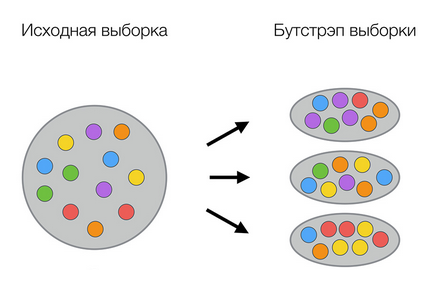
Бэггинг - Бутстрэп-агрегирование<br>
Про бэггинг и бутстрэп можно почитать [здесь](https://habr.com/ru/company/ods/blog/324402/)

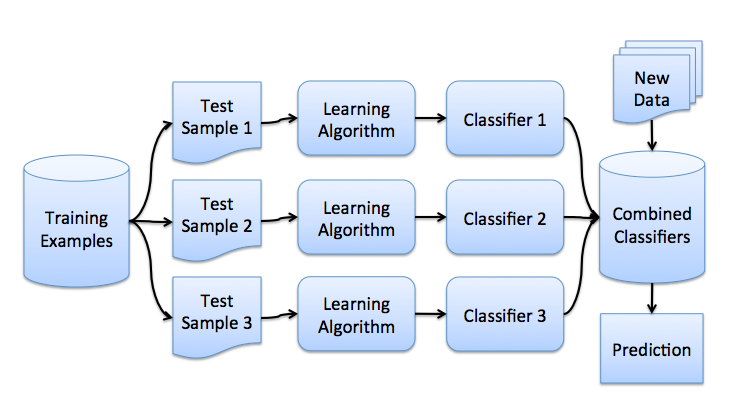

In [ ]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42, 
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

In [ ]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### Gradient Boosting decision trees  <a class='anchor' id='boost'>

Подробнее можно почитать [здесь](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d)

**Последовательно** строятся N деревьев: новое дерево обучается на ошибках предыдущих. **Предсказания деревьев суммируются**

<img src='images_21-02/gb_explained.png'>

In [ ]:
y = np.array([10, 20, 30, 5, 10])

# Первое дерево
y_pred_1 = np.array([8, 25, 34, 10, 3])
error_1 = y - y_pred_1

error_1

In [ ]:
gb_pred = y_pred_1
r2(y, gb_pred)

In [ ]:
# Второе дерево: таргет = ошибки первого (error_1)
y_2 = error_1
y_pred_2 = np.array([1, -4, -2, -1, 3])


gb_pred = y_pred_1 + y_pred_2
r2(y, gb_pred)

In [ ]:
error_2 = y - gb_pred
error_2

In [ ]:
# Третье дерево: таргет = ошибки предыдущих (error_2)
y_3 = error_2
y_pred_3 = np.array([0, -1, -1, -1, 1])

gb_pred = y_pred_1 + y_pred_2 + y_pred_3
r2(y, gb_pred)

In [ ]:
error_3 = y - gb_pred
error_3

---

In [ ]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

In [ ]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)